**PREPROCESSING DATA**

In [4]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df = pd.read_csv('Dataset_Full.csv', encoding="ISO-8859-1")

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[!$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]#', '', text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower()
    return text


# apply the preprocessing to 'Tweet' column
df['Opini'] = df['Opini'].apply(preprocess_text)
df = df.dropna(subset=['Opini'])

# save the dataset to CSV file
df.to_csv('clean_full_dataset.csv', index=False, encoding='utf-8')


**USING BERT PRETRAINED MODEL**

In [33]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load your dataset
df = pd.read_csv('Dataset_Full.csv', encoding='ISO-8859-1')

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': '1', 'LABEL_1': '0', 'LABEL_2': '-1'}

# Drop rows with NaN values in the "Opini" column
df = df.dropna(subset=['Opini'])

# Function to apply sentiment analysis and get the label
def get_sentiment_label(text):
    # Convert non-string values to string
    text = str(text)

    # Split the input text into segments of maximum length
    max_length = 512
    segments = [text[i:i + max_length] for i in range(0, len(text), max_length)]

    # Perform sentiment analysis on each segment and concatenate the results
    results = [sentiment_analysis(segment) for segment in segments]
    label = results[-1][0]['label']  # Take the label from the last segment

    return label_index[label]

# Apply sentiment analysis to each row in the "Opini" column
df['Label'] = df['Opini'].apply(get_sentiment_label)

# Save the labeled dataset to a new CSV file
df.to_csv('labeled_full_dataset.csv', index=False, encoding='utf-8')

# Print a message indicating that the dataset has been saved
print("Labeled dataset saved to 'labeled_dataset.csv'")


Labeled dataset saved to 'labeled_dataset.csv'


In [36]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('labeled_full_dataset.csv')


Kata yang paling sering muncul pada Opini:
kurikulum       11438
merdeka          8780
lebih            4745
madrasah         4740
pembelajaran     4032
siswa            3868
guru             3684
pendidikan       2939
baik             2903
belajar          2608
Name: count, dtype: int64


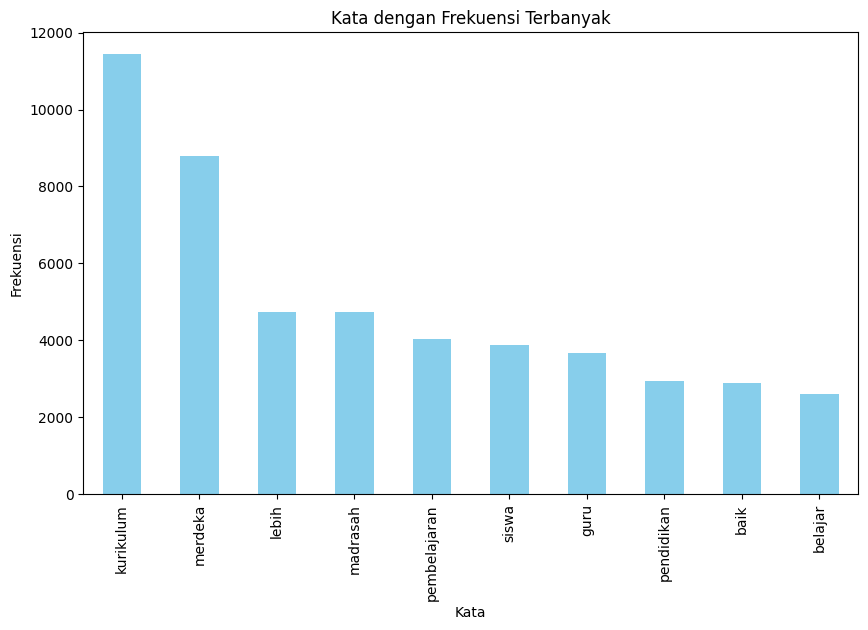

In [40]:


# Function for Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    text = text.lower()
    return text

# Apply the preprocessing to 'Opini' column
df['Opini'] = df['Opini'].apply(preprocess_text)

# Function for Tokenization and Stopword Removal
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Read Indonesian stop words
stopword_factory = StopWordRemoverFactory()
stop_words = stopword_factory.get_stop_words()

# Tokenize and remove stop words
df['Opini'] = df['Opini'].apply(tokenize_and_remove_stopwords)

# Extracting Most Common Words
all_tokens = [token for sublist in df['Opini'].tolist() for token in sublist]
word_freq = pd.Series(all_tokens).value_counts().sort_values(ascending=False)
common_words = word_freq.head(10)

# Display the most common words
print("Kata yang paling sering muncul pada Opini:")
print(common_words)

# Plot the most common words
common_words.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Kata dengan Frekuensi Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()


In [45]:
# Create a co-occurrence matrix
all_tokens_set = set(all_tokens)
co_occurrence_matrix = pd.DataFrame(0, index=list(all_tokens_set), columns=list(all_tokens_set))

for tokens in df['Opini']:
    for i, word1 in enumerate(tokens):
        if word1 in all_tokens_set:
            for j, word2 in enumerate(tokens):
                if i != j and word2 in all_tokens_set:
                    co_occurrence_matrix.at[word1, word2] += 1

# Create a graph from the co-occurrence matrix
G = nx.from_pandas_adjacency(co_occurrence_matrix)

# Save the graph in GEXF format
nx.write_gexf(G, 'semantic_network.gexf')


In [1]:
import pandas as pd

df = pd.read_csv('labeled_full_dataset.csv')

# Separate the dataset by sentiment labels
positive_df = df[df['Label'] == 1]
neutral_df = df[df['Label'] == 0]
negative_df = df[df['Label'] == -1]

# Save each dataset to a separate CSV file
positive_df.to_csv('positive_dataset.csv', index=False)
neutral_df.to_csv('neutral_dataset.csv', index=False)
negative_df.to_csv('negative_dataset.csv', index=False)


Kata yang paling sering muncul pada Opini:
kurikulum       6237
merdeka         4840
lebih           3484
madrasah        2781
siswa           2550
pembelajaran    2350
baik            2271
guru            1976
belajar         1653
pendidikan      1485
Name: count, dtype: int64


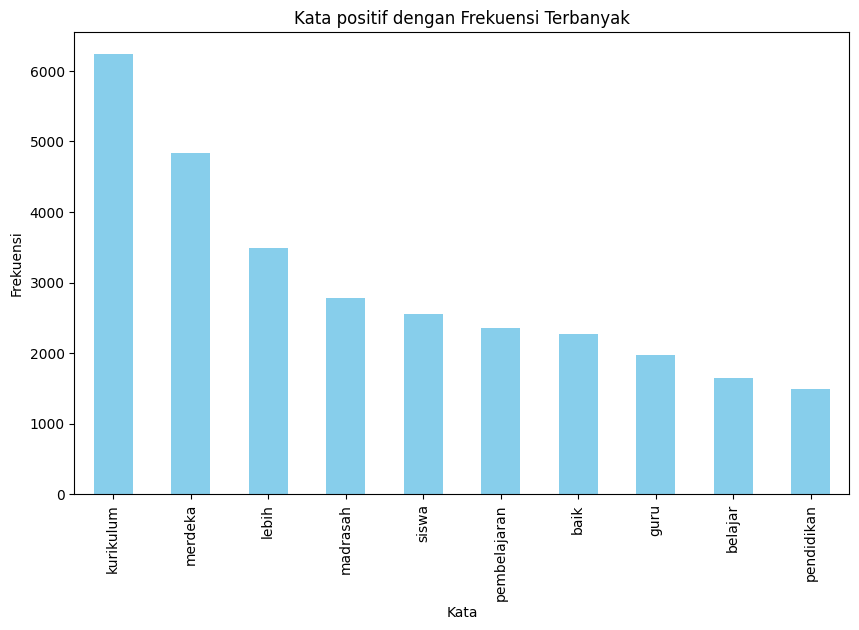

In [3]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('positive_dataset.csv')

# Function for Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    text = text.lower()
    return text

# Apply the preprocessing to column 'Opini'
df['Opini'] = df['Opini'].apply(preprocess_text)

# Function for Tokenization and Stopword Removal
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Read Indonesian stop words
stopword_factory = StopWordRemoverFactory()
stop_words = stopword_factory.get_stop_words()

# Tokenize and remove stop words
df['Opini'] = df['Opini'].apply(tokenize_and_remove_stopwords)

# Extracting Most Common Words
all_tokens = [token for sublist in df['Opini'].tolist() for token in sublist]
word_freq = pd.Series(all_tokens).value_counts().sort_values(ascending=False)
common_words = word_freq.head(10)

# Display the most common words
print("Kata yang paling sering muncul pada Opini:")
print(common_words)

# Plot the most common words
common_words.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Kata positif dengan Frekuensi Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

In [4]:
# Create a co-occurrence matrix
all_tokens_set = set(all_tokens)
co_occurrence_matrix = pd.DataFrame(0, index=list(all_tokens_set), columns=list(all_tokens_set))

for tokens in df['Opini']:
    for i, word1 in enumerate(tokens):
        if word1 in all_tokens_set:
            for j, word2 in enumerate(tokens):
                if i != j and word2 in all_tokens_set:
                    co_occurrence_matrix.at[word1, word2] += 1

# Create a graph from the co-occurrence matrix
G = nx.from_pandas_adjacency(co_occurrence_matrix)

# Save the graph in GEXF format
nx.write_gexf(G, 'positive_semantic_network.gexf')


Kata yang paling sering muncul pada Opini:
kurikulum       4079
merdeka         3168
madrasah        1600
pembelajaran    1450
pendidikan      1331
guru            1288
lebih           1091
siswa           1076
kesiapan         883
sesuai           880
Name: count, dtype: int64


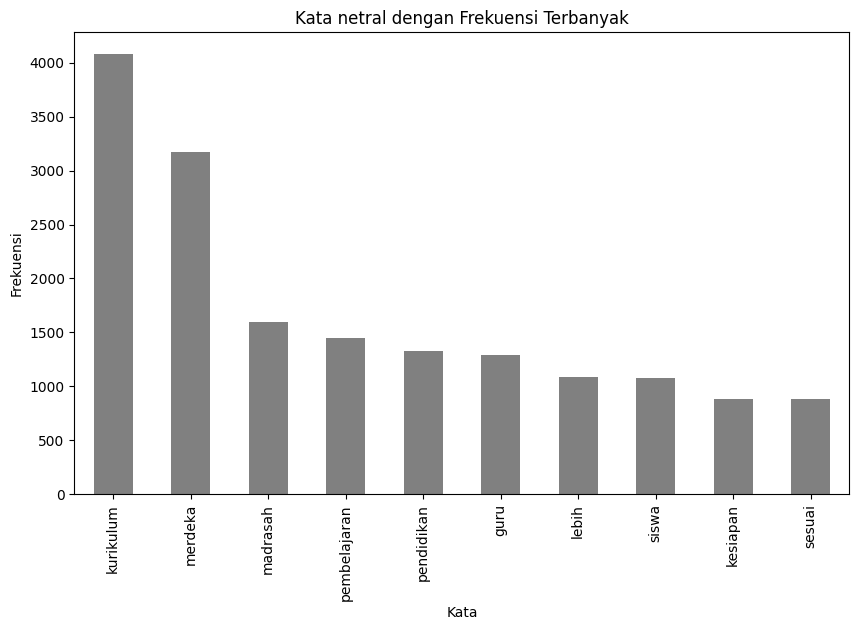

In [6]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('neutral_dataset.csv')

# Function for Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    text = text.lower()
    return text

# Apply the preprocessing to column 'Opini'
df['Opini'] = df['Opini'].apply(preprocess_text)

# Function for Tokenization and Stopword Removal
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Read Indonesian stop words
stopword_factory = StopWordRemoverFactory()
stop_words = stopword_factory.get_stop_words()

# Tokenize and remove stop words
df['Opini'] = df['Opini'].apply(tokenize_and_remove_stopwords)

# Extracting Most Common Words
all_tokens = [token for sublist in df['Opini'].tolist() for token in sublist]
word_freq = pd.Series(all_tokens).value_counts().sort_values(ascending=False)
common_words = word_freq.head(10)

# Display the most common words
print("Kata yang paling sering muncul pada Opini:")
print(common_words)

# Plot the most common words
common_words.plot(kind='bar', figsize=(10, 6), color='gray')
plt.title('Kata netral dengan Frekuensi Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

In [7]:
# Create a co-occurrence matrix
all_tokens_set = set(all_tokens)
co_occurrence_matrix = pd.DataFrame(0, index=list(all_tokens_set), columns=list(all_tokens_set))

for tokens in df['Opini']:
    for i, word1 in enumerate(tokens):
        if word1 in all_tokens_set:
            for j, word2 in enumerate(tokens):
                if i != j and word2 in all_tokens_set:
                    co_occurrence_matrix.at[word1, word2] += 1

# Create a graph from the co-occurrence matrix
G = nx.from_pandas_adjacency(co_occurrence_matrix)

# Save the graph in GEXF format
nx.write_gexf(G, 'neutral_semantic_network.gexf')


Kata yang paling sering muncul pada Opini:
kurikulum       1122
merdeka          772
siap             431
guru             420
madrasah         359
kurang           339
siswa            242
pembelajaran     232
banyak           211
yg               198
Name: count, dtype: int64


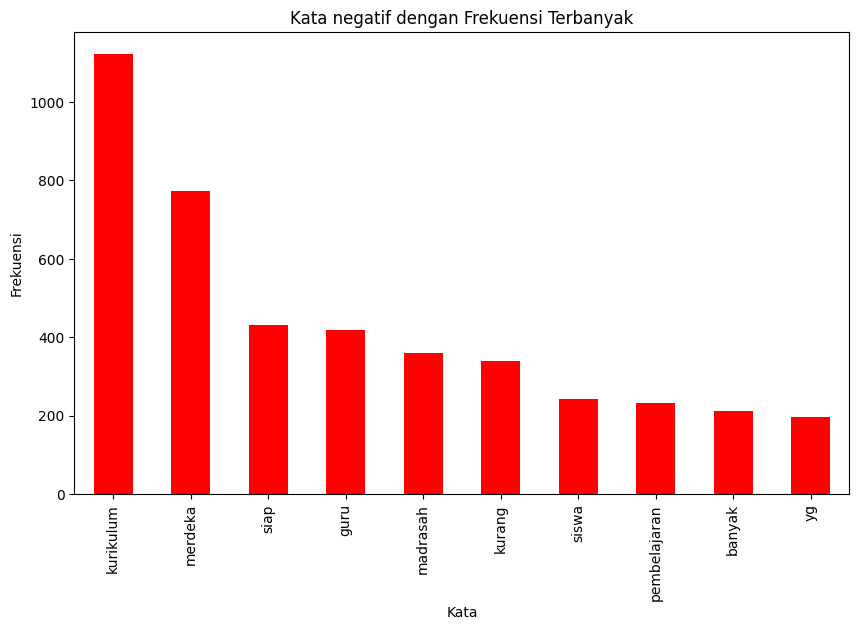

In [9]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('negative_dataset.csv')

# Function for Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    text = text.lower()
    return text

# Apply the preprocessing to column 'Opini'
df['Opini'] = df['Opini'].apply(preprocess_text)

# Function for Tokenization and Stopword Removal
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Read Indonesian stop words
stopword_factory = StopWordRemoverFactory()
stop_words = stopword_factory.get_stop_words()

# Tokenize and remove stop words
df['Opini'] = df['Opini'].apply(tokenize_and_remove_stopwords)

# Extracting Most Common Words
all_tokens = [token for sublist in df['Opini'].tolist() for token in sublist]
word_freq = pd.Series(all_tokens).value_counts().sort_values(ascending=False)
common_words = word_freq.head(10)

# Display the most common words
print("Kata yang paling sering muncul pada Opini:")
print(common_words)

# Plot the most common words
common_words.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Kata negatif dengan Frekuensi Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

In [10]:
# Create a co-occurrence matrix
all_tokens_set = set(all_tokens)
co_occurrence_matrix = pd.DataFrame(0, index=list(all_tokens_set), columns=list(all_tokens_set))

for tokens in df['Opini']:
    for i, word1 in enumerate(tokens):
        if word1 in all_tokens_set:
            for j, word2 in enumerate(tokens):
                if i != j and word2 in all_tokens_set:
                    co_occurrence_matrix.at[word1, word2] += 1

# Create a graph from the co-occurrence matrix
G = nx.from_pandas_adjacency(co_occurrence_matrix)

# Save the graph in GEXF format
nx.write_gexf(G, 'negative_semantic_network.gexf')


**USING LOGISTIC REGRESSION ALGORITHM**

**DATA UNDERSTANDING**

In [6]:
import pandas as pd
import numpy as np

#load dataset
df = pd.read_csv('labeled_full_dataset.csv')
df['Opini'] = df['Opini'].replace(np.nan,'')
df.dropna(inplace=True)
df

,Timestamp,Status,Nama Madrasah,Sudahkah Madrasah saudara mengimplementasikan Kurikulum Merdeka?,Opini,Label
0,11/1/2023 16:27:46,Tenaga Kependidikan,MTsS Al-Muhajirin,Sudah,Mulai mempersiapkan sistem pembelajaran Kuriku...,0
1,11/1/2023 16:49:52,Guru,MAN Batam,Sudah,Kalau kami ini sudah tahun kedua untuk pelaksa...,1
2,11/1/2023 16:58:47,Guru,MI ISLAMIYAH KEPOH,Sudah,Diharapkan adanya keterliban pemerintah dalam ...,0
3,11/1/2023 17:04:11,Guru,MI DAUD KHOLIFATULLOH,Sudah,Kesiapan: Implementasi Kurikulum Merdeka memer...,1
4,11/1/2023 17:18:51,Guru,MI DAUD KHOLIFATULLOH,Sudah,Saya harap perangkat kurmer bisa dibagian kese...,0
...,...,...,...,...,...,...
13339,11/11/2023 7:09:12,Guru,MI Ma'arif NU Kalisalak,Sudah,guru dapat mengenali potensi murid lebih dalam...,0
13340,11/11/2023 7:10:19,Tenaga Kependidikan,MI Unggulan Masjid Besar Jabalul Khoir 2,Sudah,Kesiapan guru bukan hanya diukur dari segi kom...,1
13341,11/11/2023 7:10:21,Guru,Mts al-hikmah kotanagaya,Belum,Menurut opini saya terkait kesiapan dan harapa...,0
13342,11/11/2023 7:20:03,Guru,MTS NURUL ISLAM,Sudah,Penerapan kurikulum merdeka di nuris sudah baik,1


In [7]:
summary_stats = df.describe()
print("Summary Statistics: ")
print(summary_stats)

Summary Statistics: 
              Label
count  13344.000000
mean       0.405650
std        0.687531
min       -1.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


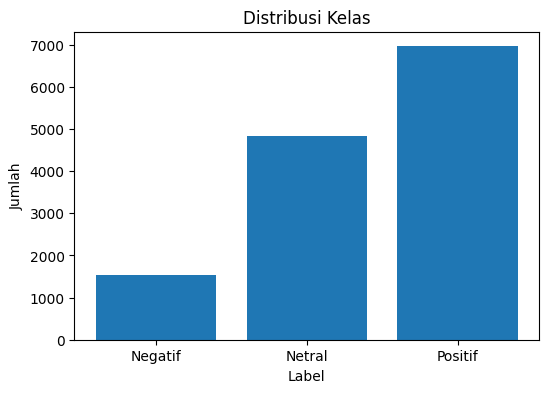

In [8]:
import matplotlib.pyplot as plt

class_labels = ['Negatif','Netral','Positif']
class_counts = np.unique(df['Label'],return_counts=True)[1]
plt.figure(figsize=(6,4))
plt.bar(class_labels,class_counts)
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title("Distribusi Kelas")
plt.show()

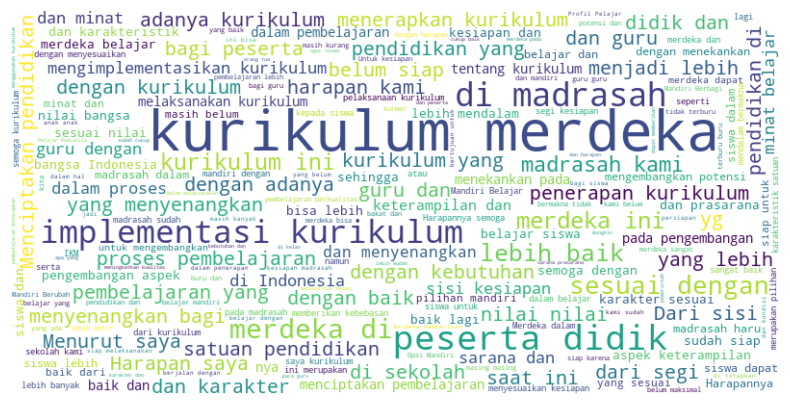

In [9]:
from wordcloud import WordCloud

all_text = ' '.join(df['Opini'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
label_counts = df['Label'].value_counts()
label_counts

Label
 1    6958
 0    4841
-1    1545
Name: count, dtype: int64

**CONNECTING SENTIMENT RESULT WITH AKMI 2023 RESULT**

In [30]:
import pandas as pd
import re

df = pd.read_csv('labeled_full_dataset.csv', encoding="utf-8")

def preprocess_text(text):
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'[!$%&\'()*+,./:;<=>?@[\\]^_`{|}~]#', '', text)
    text = text.lower()
    return text


# apply the preprocessing to 'Tweet' column
df['Nama Madrasah'] = df['Nama Madrasah'].apply(preprocess_text)
# df = df.dropna(subset=['Nama Madrasah'])

# Group by 'Nama Madrasah' and calculate the most frequent sentiment label
grouped_df = df.groupby('Nama Madrasah')['Label'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['Nama Madrasah', 'Generalized Sentiment']

# Save the result to 'generalized_sentiment.csv'
grouped_df.to_excel('generalized_sentiment.xlsx', index=False)

In [32]:
import pandas as pd
import re

# Read the AKMI dataset
akmi_df = pd.read_excel('Hasil AKMI 2023 - Report.xlsx')


# Convert 'Madrasah Name' column to string
akmi_df['Madrasah Name'] = akmi_df['Madrasah Name'].astype(str)

def preprocess_text(text):
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters except spaces
    text = text.lower()
    return text

# Apply the preprocessing to 'Madrasah Name' column
akmi_df['Madrasah Name'] = akmi_df['Madrasah Name'].apply(preprocess_text)

# Group by 'Madrasah Name' and calculate average scores
grouped_akmi_df = akmi_df.groupby('Madrasah Name')[['Average Score', 'Average Conclusion']].mean().reset_index()


# Save the result to 'generalized AKMI.xlsx'
grouped_akmi_df.to_excel('generalized AKMI.xlsx', index=False)

In [33]:
import pandas as pd

# Read the generalized sentiment dataset
sentiment_df = pd.read_csv('generalized_sentiment.csv')

# Read the generalized AKMI dataset
akmi_df = pd.read_excel('generalized AKMI.xlsx')

# Merge the datasets on 'Madrasah Name'
merged_df = pd.merge(sentiment_df, akmi_df, how='inner', left_on='Nama Madrasah', right_on='Madrasah Name')

# Drop the duplicate 'Madrasah Name' column
merged_df = merged_df.drop('Madrasah Name', axis=1)

# Save the merged dataset
merged_df.to_csv('merged_dataset.csv', index=False)


**DATA PREPROCESSING**

In [10]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df = pd.read_csv('labeled_dataset_raw.csv', encoding="utf-8")

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[!$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]#', '', text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words]

    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # join tokens to form sentence
    text = ' '.join(tokens)
    return text


# apply the preprocessing to 'Tweet' column
df['Opini'] = df['Opini'].apply(preprocess_text)
df = df.dropna(subset=['Opini'])

# save the dataset to CSV file
df.to_csv('preprocessed_dataset.csv', index=False, encoding='utf-8')


**MODELLING**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

#load dataset
df = pd.read_csv('preprocessed_dataset.csv')
df['Opini'] = df['Opini'].replace(np.nan,'')
df.dropna(inplace=True)

#feature and label
X = df['Opini']
y = df['Label']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#Use SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec,y_train)

#train model
model = MultinomialNB(alpha=1)
model.fit(X_train_resampled, y_train_resampled)

#prediction
y_pred = model.predict(X_test_vec)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ",accuracy)

accuracy :  0.6912701386286999


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from transformers import AutoTokenizer, AutoModel
import torch
from imblearn.over_sampling import SMOTE

# Load your preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')
df['Opini'] = df['Opini'].replace(np.nan, '')
df.dropna(inplace=True)

# Feature and label
X = df['Opini']
y = df['Label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Use IndoBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased")

# Tokenize and convert to TF-IDF
max_length = 64  # Set your desired maximum length
X_train_tfidf = tokenizer(X_train.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=max_length)
X_test_tfidf = tokenizer(X_test.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=max_length)

# Get embeddings using IndoBERT model
with torch.no_grad():
    train_outputs = model(**X_train_tfidf)
    test_outputs = model(**X_test_tfidf)

# Extract embeddings from the last layer
X_train_emb = train_outputs.last_hidden_state.mean(dim=1).numpy()
X_test_emb = test_outputs.last_hidden_state.mean(dim=1).numpy()

# Use SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_emb, y_train)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

# Prediction
X_test_vec = test_outputs.last_hidden_state.mean(dim=1).numpy()
y_pred = lr_model.predict(X_test_vec)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

          -1       0.34      0.63      0.44       167
           0       0.66      0.64      0.65       486
           1       0.77      0.63      0.69       682

    accuracy                           0.63      1335
   macro avg       0.59      0.63      0.59      1335
weighted avg       0.68      0.63      0.64      1335



c:\Users\Naufal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
